In [6]:
cd data

/content/data


# 機械学習　第８章　実習問題（回帰）

## 問題文に従って各問題ごとにセルを複数追加してプログラムを実装してください。

## ※ 準備作業
### ▶ 以下を実施してください。

In [3]:
# ドライブのマウント

# ディレクトリの作成

# ディレクトリへの移動


# house_rent.csv のアップロード

## ※ matplotlib日本語化のためのライブラリのインストール
### ▶ 以下を実行してください。

In [4]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.4 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=c6d9dbb2474efb44a0f193068b43f7b7fe6db8c3c8bab1563ce8c9da24116053
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


## データ分析対象データ

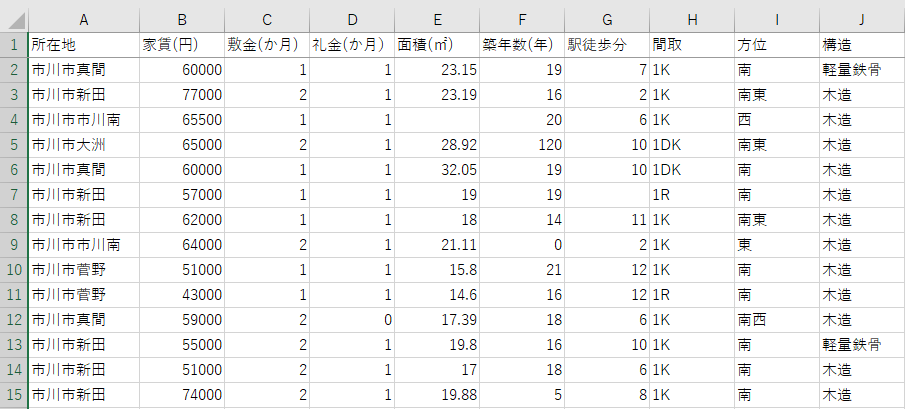

### ■ 正解データ　：　家賃（円）
### ■ 特徴量候補　：　所在地、敷金（か月）、礼金（か月）、面積（㎡）、築年数（年）、駅徒歩、間取、方位、構造

## 問題１　本データのデータ分析において使用する各種ライブラリをインポートしてください。
## また、グラフ表示が同一タブ上に表示されるようにしてください。

In [38]:
# japanize_matplotlibインポート( plotの文字化けを解消するため )
import japanize_matplotlib

# pandasをインポートし、別名 pd とする
# 実装
import pandas as pd

# treeモジュールのインポート
# 実装
from sklearn import tree

# train_test_splitメソッドのインポート
# 実装
from sklearn.model_selection import train_test_split

# グラフ描画を当タブに表示
# 実装
%matplotlib inline


## 問題２　CSVファイル house_rent.csv を読み込んでください。ただし、エンコーディングは cp932 を使用してください。

In [39]:
#実装
df = pd.read_csv('house_rent.csv', encoding='cp932')

## 問題３　読み込んだCSVファイルの先頭５行と末尾５行を表示してください。

In [40]:
# 先頭5行を表示
df.head(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,1DK,南東,木造
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,1DK,南,木造


In [41]:
# 末尾5行を表示
df.tail(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
299,市川市新田,64000,2,1.0,22.01,NaN,5.0,1R,南,木造
300,市川市新田,52000,1,0.0,18.02,25.0,13.0,1K,南東,軽量鉄骨
301,市川市新田,57000,1,1.0,21.70,20.0,10.0,1K,南,木造
302,市川市真間,60000,1,1.0,20.37,13.0,14.0,1K,西,鉄骨造
303,市川市新田,72000,2,1.0,20.70,0.0,2.0,1K,東,鉄骨造


## 問題４　質的データの列をすべて挙げてください。つぎに、それらの列にデータが何種類あるかを調べて表示してください。

In [42]:
#データの列名を取得
df.columns # カラムの参照

Index(['所在地', '家賃(円)', '敷金(か月)', '礼金(か月）', '面積(㎡)', '築年数(年)', '駅徒歩分', '間取',
       '方位', '構造'],
      dtype='object')

In [12]:
df.value_counts() # インデックスの参照

所在地     家賃(円)  敷金(か月)  礼金(か月）  面積(㎡)  築年数(年)  駅徒歩分  間取  方位  構造
市川市新田   72000  2       1.0     20.70  0.0     2.0   1K  南東  木造    4
        67000  2       1.0     20.70  0.0     2.0   1K  南東  木造    3
市川市真間   62000  2       2.0     20.28  9.0     10.0  1K  西   木造    2
市川市市川南  52000  1       1.0     18.15  16.0    6.0   1K  北   木造    2
市川市真間   56000  1       0.0     17.32  23.0    8.0   1K  南西  木造    2
                                                                 ..
市川市市川南  61000  1       1.0     18.31  18.0    2.0   1R  南   木造    1
        60000  2       2.0     17.35  16.0    4.0   1K  東   木造    1
                       1.0     19.00  11.0    7.0   1K  南   木造    1
                               18.50  16.0    10.0  1K  南西  木造    1
市川市須和田  73000  2       1.0     24.40  16.0    15.0  1K  南西  木造    1
Length: 290, dtype: int64

## 問題５　質的データをすべてダミー化してデータ分析させるデータフレームを作成して下さい。次に、作成したデータフレームの先頭５行を表示してください。

In [43]:
#ダミー変数化
df_dummies = pd.get_dummies(df,drop_first=False)

# 作成したデータフレームの先頭5行を表示
df_dummies.head(5)

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造
0,60000,1,1.0,23.15,19.0,7.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,77000,2,1.0,23.19,16.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,65500,1,1.0,NaN,20.0,6.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,65000,2,1.0,28.92,120.0,10.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,60000,1,1.0,32.05,19.0,10.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


## 問題６　問題５で作成したデータフレームにおいて、訓練データ、検証データ、テストデータに分割してください。
### ただし、訓練データとテストデータの比率は８：２、乱数シードは０とします。

In [68]:
# 訓練データとテストデータに分割
# 訓練データ:テストデータ = 8:2 ( test_size=0.2 ) 
# 乱数シード:0 ( random_state=0 )
train_data , test_data = train_test_split(df_dummies , test_size=0.2, random_state=0)

## 問題７　訓練データにおいて、欠損値を確認して表示し、平均値で穴埋めしてください。欠損値処理した訓練データの先頭５行を表示してください。

In [69]:
#訓練データの欠損値を確認
train_data.isnull().sum()
#面積(㎡),築年数(年),駅徒歩分のカラムの欠損値を平均値で埋める
train_data['面積(㎡)'] = train_data['面積(㎡)'].fillna(train_data['面積(㎡)'].mean())
train_data['築年数(年)'] = train_data['築年数(年)'].fillna(train_data['築年数(年)'].mean())
train_data['駅徒歩分'] = train_data['駅徒歩分'].fillna(train_data['駅徒歩分'].mean())

train_data.head(5)

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造
176,69000,2,1.0,19.87,1.0,2.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
26,70000,2,2.0,31.53,28.0,8.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
74,65000,2,1.0,28.92,12.0,10.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
101,51000,1,1.0,20.50,20.0,2.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
154,72000,2,1.0,20.70,0.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


## 問題８　外れ値処理をしてください。
### ただし、処理過程を説明できるようにセルを構成してください。

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


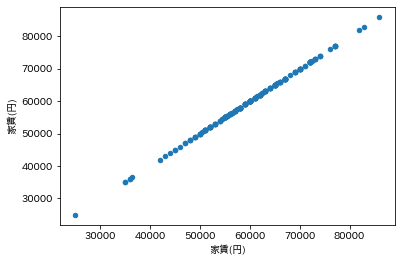

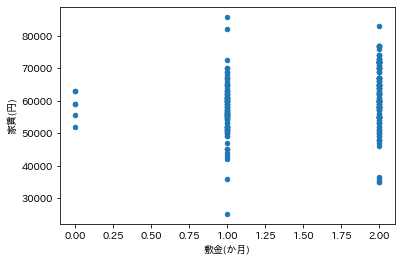

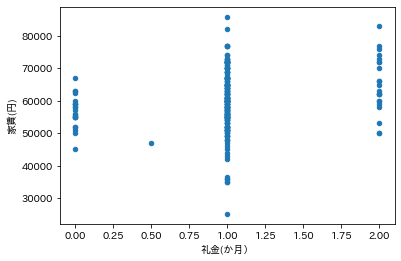

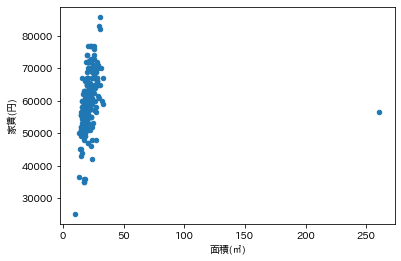

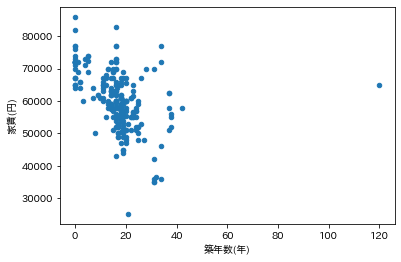

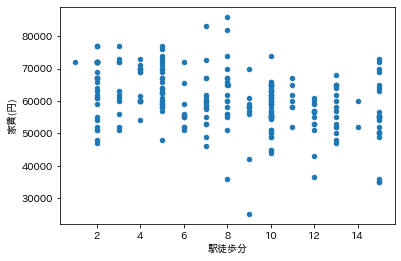

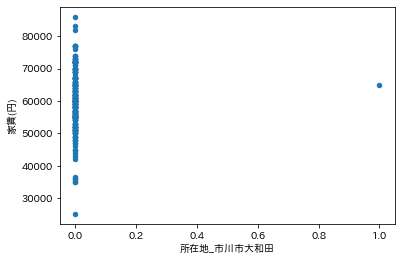

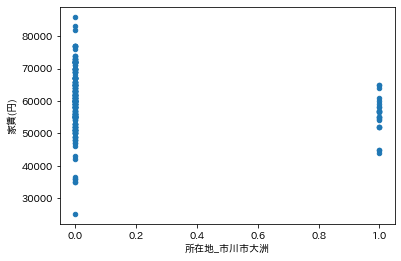

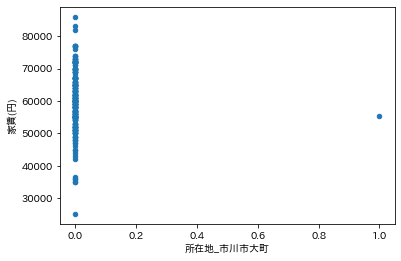

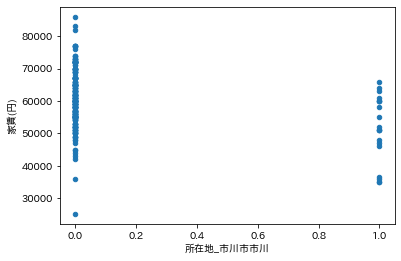

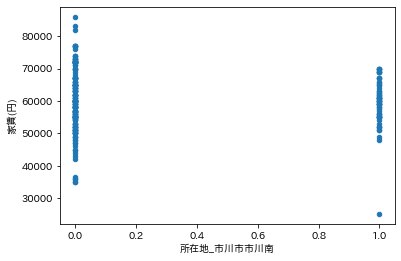

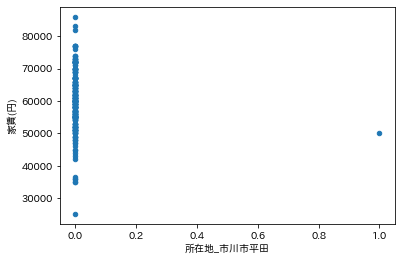

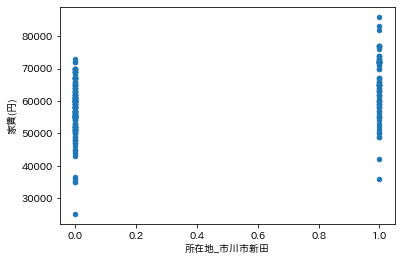

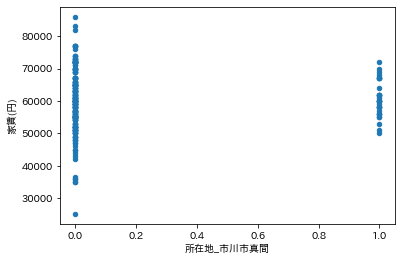

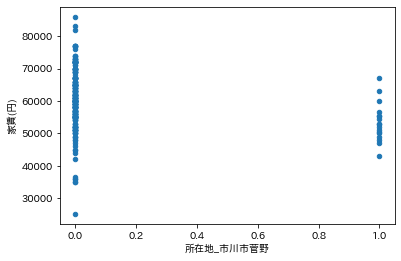

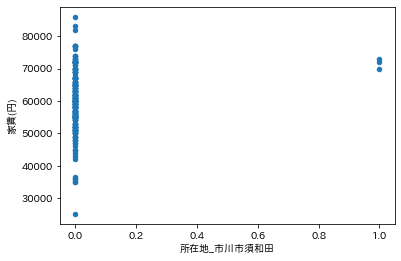

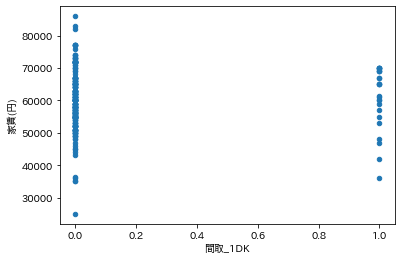

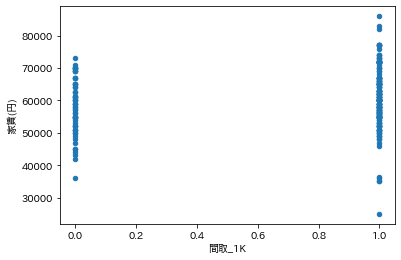

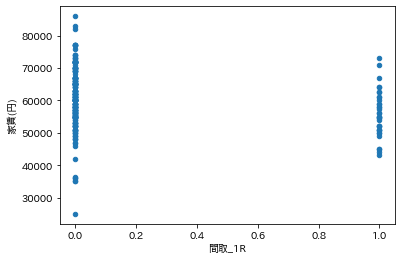

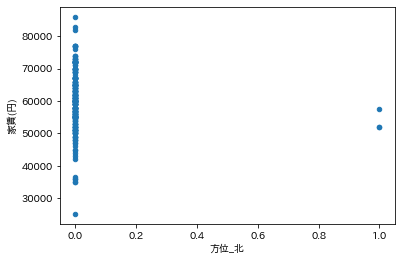

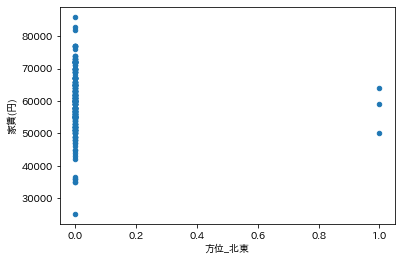

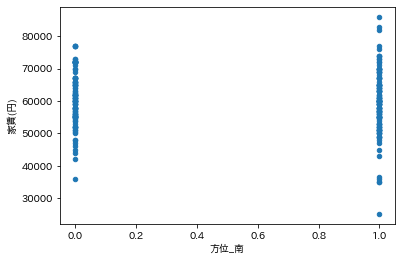

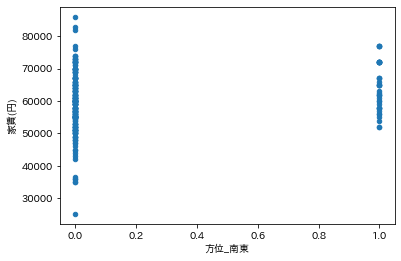

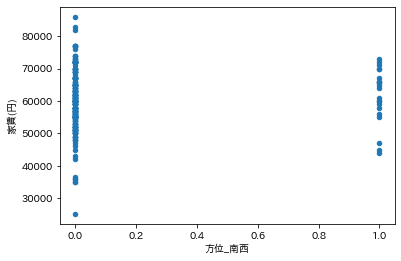

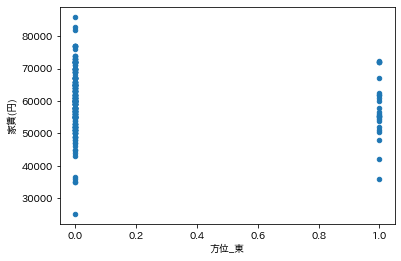

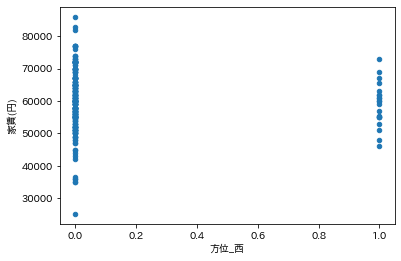

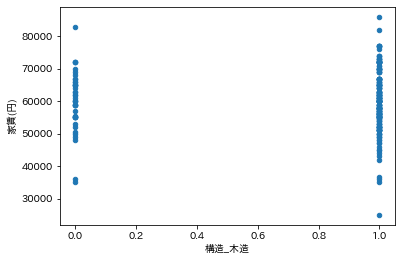

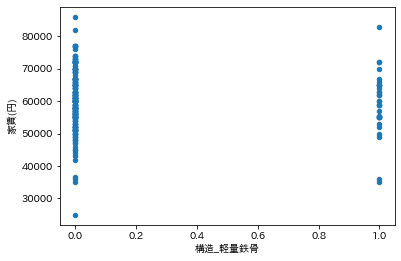

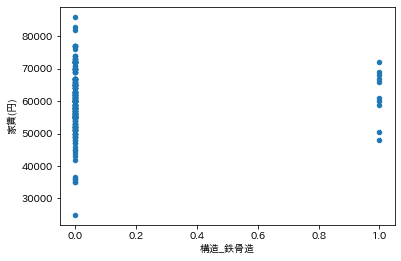

In [70]:
# 各特徴量の列と家賃列の相関関係を示す散布図を描く
# 　目的： 各列のどの範囲が外れ値となるかを図から確認するため
colname = train_data.columns
for name in colname:
    train_data.plot(kind = 'scatter' , x = name , y = '家賃(円)')

In [47]:
# 【 外れ値のインデックスを確認する 】
print(train_data[(train_data['築年数(年)'] > 100)].index)

print(train_data[(train_data['面積(㎡)'] > 250)].index)


Int64Index([3], dtype='int64')
Int64Index([95], dtype='int64')


In [71]:
# 該当インデックスを削除（外れ値を削除）
train_data2 = train_data.drop([3, 95], axis = 0)

## 問題９　外れ値処理の結果を表示してください。

In [49]:
print("外れ値処理 前:",train_data.shape[0],"行")
print("外れ値処理 後:",train_data2.shape[0],"行")

外れ値処理 前: 243 行
外れ値処理 後: 241 行


## 問題１０　正解データと各特徴量の相関関係を説明できるように表示してください。

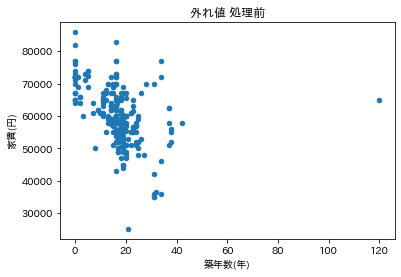

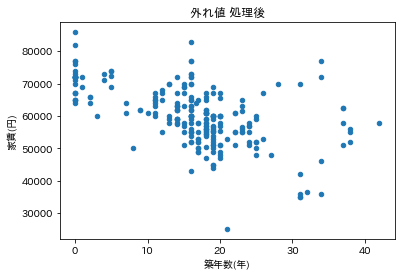

In [50]:
# 描画で再確認('築年数(年)')
train_data.plot(kind = 'scatter' , x = '築年数(年)' , y = '家賃(円)', title = "外れ値 処理前")
train_data2.plot(kind = 'scatter' , x = '築年数(年)' , y = '家賃(円)', title = "外れ値 処理後")

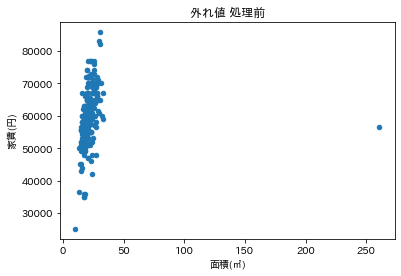

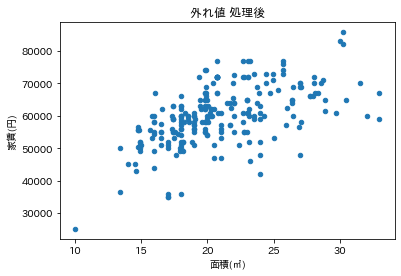

In [51]:
# 描画で再確認('駅徒歩分')
train_data.plot(kind = 'scatter' , x = '面積(㎡)' , y = '家賃(円)', title = "外れ値 処理前")
train_data2.plot(kind = 'scatter' , x = '面積(㎡)' , y = '家賃(円)', title = "外れ値 処理後")

## 問題１１　正解データと特徴量を抽出し、それぞれの先頭５行を表示してください。

In [83]:
# 特徴量
x = train_data2.drop('家賃(円)',axis = 1)
x.head(5)

,敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1DK,間取_1K,間取_1R,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造
176,2,1.0,19.87,1.0,2.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
26,2,2.0,31.53,28.0,8.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
74,2,1.0,28.92,12.0,10.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
101,1,1.0,20.50,20.0,2.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
154,2,1.0,20.70,0.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [84]:
# 正解データ
t = train_data2[['家賃(円)']]
t.head(5)

,家賃(円)
176,69000
26,70000
74,65000
101,51000
154,72000


## 問題１２　問題１１で抽出した正解データと特徴量を使用して、訓練データと検証データに分割してください。
### ただし、訓練データと検証データの比率は８：２、乱数シードは０とします。

In [85]:
x_train, x_val, y_train, y_val = train_test_split(x, t , test_size=0.2, random_state=0)

## 問題１３　線形重回帰モデルを使用して学習さて、検証データで決定係数を求めて表示してください。

In [86]:
x_val.columns

Index(['敷金(か月)', '礼金(か月）', '面積(㎡)', '築年数(年)', '駅徒歩分', '所在地_市川市大和田',
       '所在地_市川市大洲', '所在地_市川市大町', '所在地_市川市市川', '所在地_市川市市川南', '所在地_市川市平田',
       '所在地_市川市新田', '所在地_市川市真間', '所在地_市川市菅野', '所在地_市川市須和田', '間取_1DK', '間取_1K',
       '間取_1R', '方位_北', '方位_北東', '方位_南', '方位_南東', '方位_南西', '方位_東', '方位_西',
       '構造_木造', '構造_軽量鉄骨', '構造_鉄骨造'],
      dtype='object')

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, y_train) # 学習

model.score(x_val , y_val)  # 決定係数を求める(正解率が64.28%)

0.6428644749404886

## 問題１４　問題１３で学習したモデルを使用して以下のデータを使用して家賃がいくらになるか予測させてください。
### 予測させるデータは以下の通りです。
#### 敷金：１か月
#### 礼金；１か月
#### 面積：３０㎡
#### 築年数：３年
#### 駅徒歩分：１０分
#### 所在地：市川市新田
#### 間取：１DK
#### 方位：南向き
#### 構造：鉄骨造


In [77]:
# 予測データ
# 敷金(か月): 礼金(か月）: 面積(㎡): 築年数(年): 駅徒歩分: 所在地_市川市大和田: 所在地_市川市大洲: 所在地_市川市大町: 所在地_市川市市川: 所在地_市川市市川南: 所在地_市川市平田: 所在地_市川市新田: 所在地_市川市真間: 所在地_市川市菅野: 所在地_市川市須和田: 間取_1DK: 間取_1K: 間取_1R: 方位_北: 方位_北東: 方位_南: 方位_南東: 方位_南西: 方位_東: 方位_西: 構造_木造: 構造_軽量鉄骨: 構造_鉄骨造
t_d = [[1, 1.0, 30.00, 3.0, 10.0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]]

# 予測処理
t_restule = model.predict(t_d)

# 予測結果表示
t_restule

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[74028.47735257]])

## 問題１５　特徴量エンジニアリングで訓練データと検証データの決定係数が特徴量エンジニアリングを行う前より良くなるようにしてください。
### ただし、特徴量エンジニアリングの過程が理解できるようにセルを構成してください。

In [88]:
#特徴量エンジニアリング
#その①
#多項式特徴量　面積**2  ※62％に減少。3乗、4乗も試したが、64%より上昇しなかったのでボツ
#x_train["面積(㎡)2"] = x_train["面積(㎡)"]**2
#x_val["面積(㎡)2"] = x_val["面積(㎡)"]**2

#その②
#交互作用特徴量　面積*築年数　※65.31%に上昇　採用
x_train['面積(㎡) * 築年数(年)'] = x_train['面積(㎡)'] * x_train['築年数(年)']
x_val['面積(㎡) * 築年数(年)'] = x_val['面積(㎡)'] * x_val['築年数(年)']

#その③
#交互作用特徴量　面積*駅徒歩　※64.45%に上昇　上昇幅も少ないので不採用
#x_train['面積(㎡) * 駅徒歩分'] = x_train['面積(㎡)'] * x_train['駅徒歩分']
#x_val['面積(㎡) * 駅徒歩分'] = x_val['面積(㎡)'] * x_val['駅徒歩分']

#その④
#交互作用特徴量　築年数*駅徒歩　※65.32%に上昇　採用
x_train['築年数(年) * 駅徒歩分'] = x_train['築年数(年)'] * x_train['駅徒歩分']
x_val['築年数(年) * 駅徒歩分'] = x_val['築年数(年)'] * x_val['駅徒歩分']

#学習、成果を確認する
model = LinearRegression()

model.fit(x_train, y_train) # 学習

model.score(x_val , y_val)  # 決定係数を求める(その②、その④の複合で正解率が66.18%に上昇)


0.6617666531376774

## 問題１６　チューニング結果を受けて、データの標準化後再学習をしてください。

In [89]:
# 【標準化処理】
import numpy as np
from sklearn.preprocessing import StandardScaler

sc_mdl_x = StandardScaler()
sc_mdl_x.fit(x_train)

sc_mdl_y = StandardScaler()
sc_mdl_y.fit(y_train)

sc_x = sc_mdl_x.transform(x_train)
sc_y = sc_mdl_y.transform(y_train)

sc_x_val = sc_mdl_x.transform(x_val)
sc_y_val = sc_mdl_y.transform(y_val)

## 問題１７　テストデータを使用してモデルを評価してください。
## ただし、決定係数の値が 0.65 以上となるようにしてください。

In [90]:
model = LinearRegression()
model.fit(sc_x,sc_y)

model.score(sc_x_val,sc_y_val)

0.6617666531376758

## 問題１８　モデルとStandardScalerオブジェクトを保存してください。
### ただし、モデルは house_rent.pkl、StandardScalerオブジェクトは house_rent_scx と house_rent_scy とします。

In [65]:
import pickle

with open('house_rent.pkl','wb') as f:
  pickle.dump(model,f)
with open('house_rent_scx.pkl','wb') as f:
  pickle.dump(sc_mdl_x,f)
with open('house_rent_scy.pkl','wb') as f:
  pickle.dump(sc_mdl_y,f)
